<a href="https://colab.research.google.com/github/vipulshah31120/Market_Basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Analysis**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
#import chardet

#with open('/content/drive/MyDrive/online_retail.csv', 'rb') as f:
#  rawdata = f.read()
#  result = chardet.detect(rawdata)
#  encoding = result['encoding']

#df = pd.read_csv('/content/drive/MyDrive/online_retail.csv', encoding=encoding)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
url = 'https://assets.datacamp.com/production/repositories/5654/datasets/5a3bc2ebccb77684a6d8a9f3fbec23fe04d4e3aa/online_retail.csv'
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)


## **Exploratory Data Analysis**

In [4]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Dropping the rows without any invoice number
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224372 entries, 0 to 227748
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    224372 non-null  object
 1   StockCode    224372 non-null  object
 2   Description  224016 non-null  object
dtypes: object(3)
memory usage: 6.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description
count,224372,224372,224016
unique,8410,3347,3446
top,573585,22086,PAPER CHAIN KIT 50'S CHRISTMAS
freq,1114,922,922


In [22]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo        0
StockCode        0
Description    356
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo      0
StockCode      0
Description    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


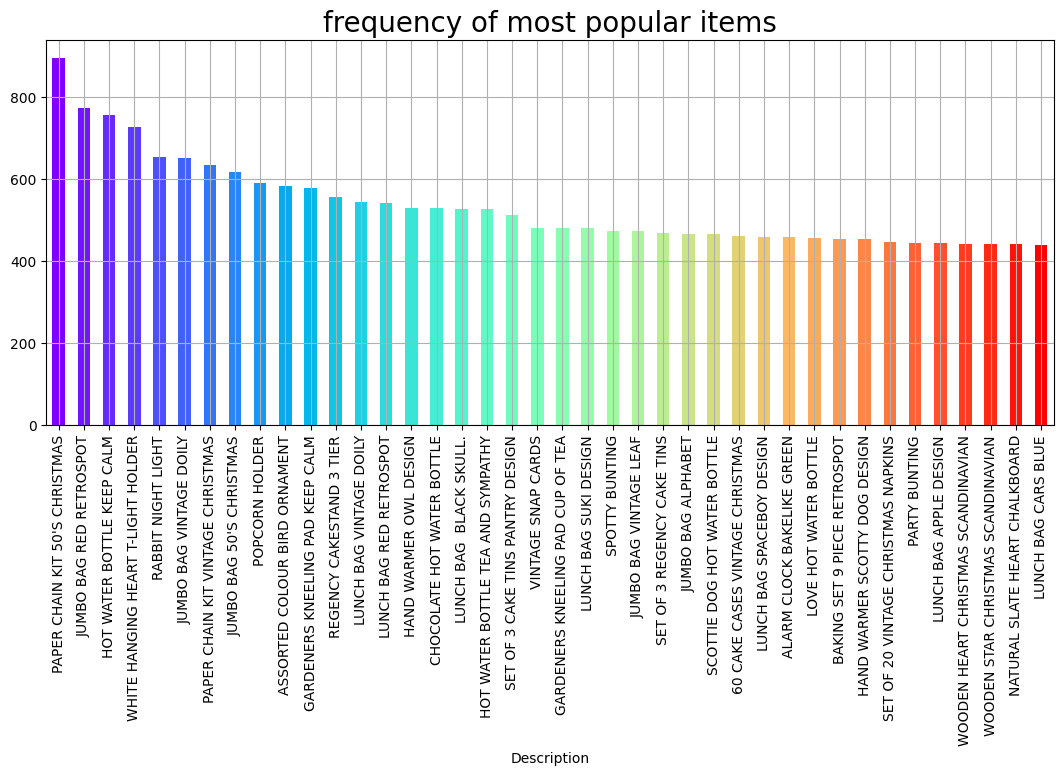

In [28]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
# Assuming the first column (index 0) contains the item information
df.iloc[:, 2].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

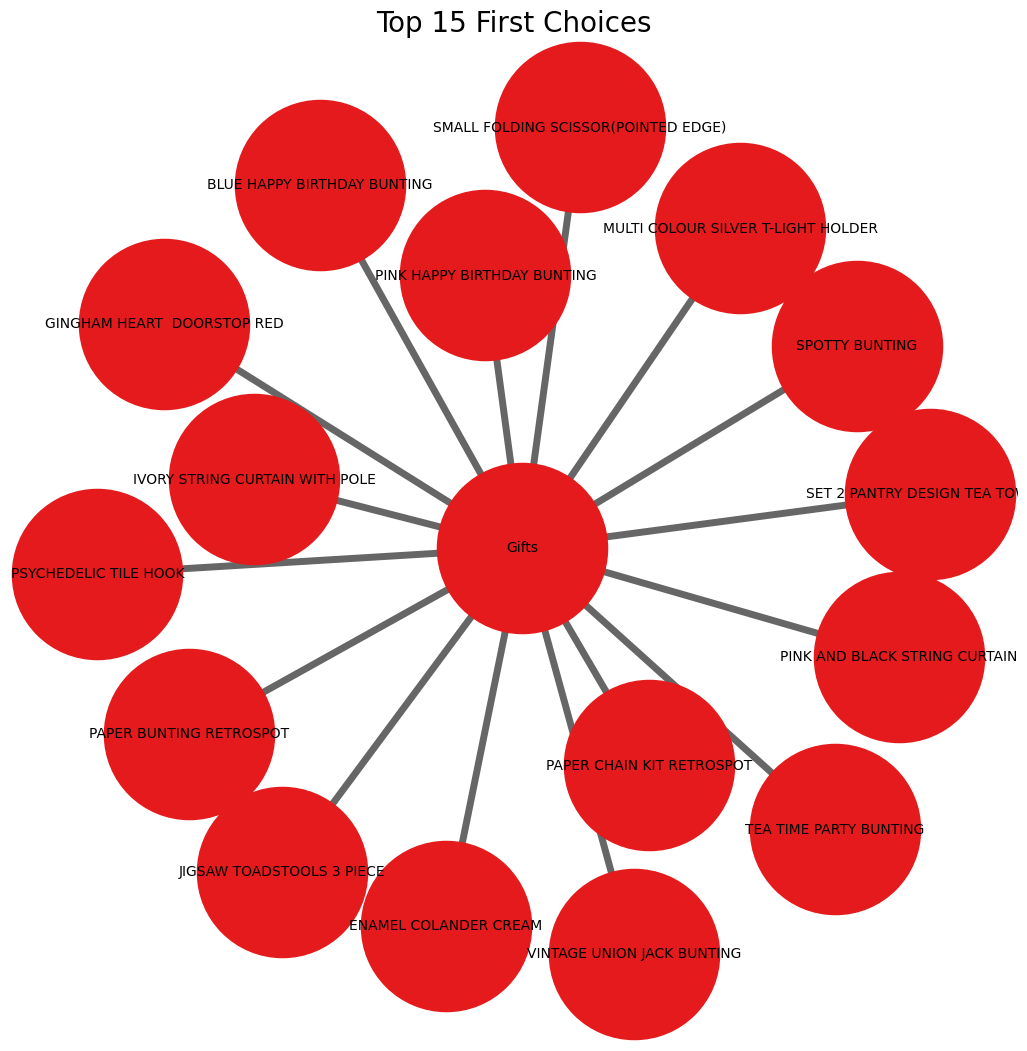

In [97]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

df['Gifts'] = 'Gifts'
Gifts = df.truncate(before = -1, after = 15)

#'Description' is the column we want to use as target
Gift = nx.from_pandas_edgelist(Gifts, source = 'Gifts', target = 'Description', edge_attr = True)

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(Gift)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(Gift, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(Gift, pos, width = 5, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(Gift, pos, font_size = 10, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [9]:
# Recover unique InvoiceNo's.
InvoiceNo = df['InvoiceNo'].unique()

# Create basket of items for each transaction.
Transactions = [list(df[df['InvoiceNo'] == u].Description.astype(str)) for u in InvoiceNo]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Print example transaction.
Transactions[0]

['IVORY STRING CURTAIN WITH POLE',
 'PINK AND BLACK STRING CURTAIN',
 'PSYCHEDELIC TILE HOOK',
 'ENAMEL COLANDER CREAM',
 'SMALL FOLDING SCISSOR(POINTED EDGE)',
 'JIGSAW TOADSTOOLS 3 PIECE']

In [10]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder # Import the TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **One-Hot Encoding**

In [11]:
# Instantiate transaction encoder.
encoder = TransactionEncoder()

# One-hot encode transactions.
onehot = encoder.fit(Transactions).transform(Transactions)

# Use unique items as column headers.
#onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)    #Already removed null values

onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Print onehot header.
onehot_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**## Performing aggregation**
We have to advise an online novelty gifts retailer on cross-promotions. We start the project by exploring its transaction data. We have been asked to perform aggregation for all signs (True/False) in the dataset and also compute the support for this category.

In [12]:
# Convert words to a list of words
def convert_str(string):
  lst = list(string.split())
  return lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Select the column headers for sign items
sign_header = []
for i in onehot_df.columns:
   wrd_lst = convert_str(str(i).lower())
   if 'sign' in wrd_lst:
    sign_header.append(i)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Select columns of sign items
sign_df = onehot_df[sign_header]

# Perform aggregation of sign items into sign category
signs = sign_df.sum(axis = 1) >= 1.0

# Print support for signs
print('Share of Signs: %.2f' % signs.mean())

Share of Signs: 0.21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Defining an aggregation function**
Surprised by the high share of sign items in its inventory, it makes sense to do further aggregation for different categories to explore the data better. This seems trivial to us, but we have to perform a basic **descriptive analysis** of its transaction and items.

The retailer asks us to perform aggregation for the candles, bags, and boxes categories. To simplify the task, we decide to write a function. It will take a string that contains an item's category. It will then output a DataFrame that indicates whether each transaction includes items from that category.

In [15]:
def aggregate(item, onehot):
    # Select the column headers for sign items
    item_headers = []

    # Ensure onehot is a DataFrame
    if not isinstance(onehot, pd.DataFrame):
        # Attempt to convert to DataFrame if it's not
        onehot = pd.DataFrame(onehot)

    for i in onehot.columns:
        wrd_lst = convert_str(str(i).lower())
        if item in wrd_lst:
            item_headers.append(i)

    # Select columns of sign items
    item_columns = onehot[item_headers]

    # Return category of aggregated items
    return item_columns.sum(axis = 1) >= 1.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Aggregate items for the bags, boxes, and candles categories
bags = aggregate('bag', onehot_df)
boxes = aggregate('box', onehot_df)
candles = aggregate('candle', onehot_df)

print('Share of Bags: %.2f' % bags.mean())
print('Share of Boxes: %.2f' % boxes.mean())
print('Share of Candles: %.2f' % candles.mean())

Share of Bags: 0.43
Share of Boxes: 0.40
Share of Candles: 0.12


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Metrics and pruning**
A metric is a measure of performance for rules.

* {humor} → {poetry} → 0.81
* {Action} → {travel} → 0.23

Pruning is the use of metrics to discard rules.
* Retain: {humor} → {poetry}
* Discard: { Action} → {travel}

The simplest metric
The support metric measures the share of transactions that contain an itemset.
number of transactions with items(s)number of transactions

In [17]:
# Compute the support
support = onehot_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support
PAPER CHAIN KIT 50'S CHRISTMAS,0.111125
JUMBO BAG RED RETROSPOT,0.096101
HOT WATER BOTTLE KEEP CALM,0.093866
WHITE HANGING HEART T-LIGHT HOLDER,0.090142
RABBIT NIGHT LIGHT,0.081202


In [19]:
support.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support
count,3446.000000
mean,0.007854
std,0.011260
min,0.000124
25%,0.000869
50%,0.003477
75%,0.010554
max,0.111125


## **The Apriori algorithm**

Apriori algorithm offers alternative.
Doesn't require enumeration of all itemsets.
Sensible rule for pruning.

**The Apriori principle**:
* Subsets of frequent sets are frequent.
* Retain sets known to be frequent.
* Prune sets not known to be frequent.
Ex:

* Candles = Infrequent
 * {Candles, Signs} = Infrequent
* {Candles, Signs} = Infrequent
 *  {Candles, Signs Boxes} = Infrequent
* {Candles, Signs, Boxes} = Infrequent
 * {Candles, Signs, Boxes, Bags} = Infrequent

## Identifying frequent itemsets with Apriori
The aggregation exercise we performed for the online retailer proved helpful. It offered a starting point for understanding which categories of items appear frequently in transactions. The retailer now wants to explore the individual items themselves to find out which are frequent.

Here we'll apply the Apriori algorithm to the online retail dataset without aggregating first. Our objective will be to prune the itemsets using a minimum value of support and a maximum item number threshold.

In [18]:
import pandas as pd

# Assuming onehot is your NumPy array
df_onehot = pd.DataFrame(onehot)  # Convert array to DataFrame

# Proceed with apriori using the DataFrame
frequent_itemsets = apriori(df_onehot,
                             min_support = 0.05,
                             max_len = 3)
# Print a preview of the frequent itemsets
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.057114,(90)
1,0.056866,(133)
2,0.052769,(137)
3,0.050534,(186)
4,0.072262,(204)


## Selecting a support threshold
 All of the itemsets we identified contain only one item. Could it be possible to use a less restrictive rule and to generate more itemsets, possibly including those with multiple items.

We think about what might explain the lack of itemsets with more than  1
  item. It can't be the max_len parameter, since that was set to  3
 . We decide it must be support and decide to test two different values, each time checking how many additional itemsets are generated.

In [19]:
# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(df_onehot, min_support = 0.04,
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(df_onehot, min_support = 0.05,
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


97 58


## **Basic Apriori results pruning**
### **Apriori prunes itemsets.**
* Applies minimum support threshold.
* Modified version can prune by number of items.
* Doesn't tell us about association rules.

### Association rules.
* Many more association rules than itemsets.
* {Bags, Boxes}: Bags -> Boxes OR Boxes -> Bags.

### **How to compute association rules**
### Computing rules from Apriori results.
* Difficult to enumerate for high  n
  and k.
* Could undo itemset pruning by Apriori.

### Reducing number of association rules.
* mlxtend module offers means of pruning association rules.
* association_rules() takes frequent items, metric, and threshold.

### Generating association rules
* Previously we computed itemsets for the novelty gift store owner using the Apriori algorithm. Relaxing support from 0.05 to 0.04 increased the number of itemsets from  58
  to  97.
* The store manager asks us to identify some association rules from those two sets of frequent itemsets we computed.

Our objective is to determine what association rules can be mined from these itemsets.

In [20]:
# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1,
                            metric = "support",
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2,
                            metric = "support",
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

8 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Pruning with lift**
We identified  2
  rules when we used a higher support threshold for the Apriori algorithm and only 8
  rules when you used a lower threshold.
  We have to consider using another metric to refine the two rules.

We remember that lift had a simple interpretation: values greater than  1
  indicate that items co-occur more than we would expect if they were independently distributed across transactions. We decide to use lift, since that message will be simple to convey.

In [21]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot_df, min_support = 0.03,
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                            metric = "lift",
                            min_threshold = 1.0)

# Print association rules
rules.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         48 non-null     object 
 1   consequents         48 non-null     object 
 2   antecedent support  48 non-null     float64
 3   consequent support  48 non-null     float64
 4   support             48 non-null     float64
 5   confidence          48 non-null     float64
 6   lift                48 non-null     float64
 7   leverage            48 non-null     float64
 8   conviction          48 non-null     float64
 9   zhangs_metric       48 non-null     float64
dtypes: float64(8), object(2)
memory usage: 3.9+ KB


In [22]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.052769,0.056866,0.038118,0.722353,12.702687,0.035117,3.396880,0.972599
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.056866,0.052769,0.038118,0.670306,12.702687,0.035117,2.873059,0.976825
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.065557,0.051155,0.030296,0.462121,9.033797,0.026942,1.764050,0.951695
3,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.051155,0.065557,0.030296,0.592233,9.033797,0.026942,2.291609,0.937249
4,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.065557,0.093866,0.032903,0.501894,5.346897,0.026749,1.819158,0.870011


## **Pruning with confidence**
We decide to see whether pruning by another metric might allow us to narrow things down even further.

What would be the right metric? Both lift and support are identical for all rules that can be generated from an itemset, so we decide to use confidence instead, which differs for rules produced from the same itemset.

In [23]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot_df, min_support = 0.03,
                            max_len = 2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets,
                            metric = "confidence",
                            min_threshold = 0.4)

# Print association rules
rules.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         39 non-null     object 
 1   consequents         39 non-null     object 
 2   antecedent support  39 non-null     float64
 3   consequent support  39 non-null     float64
 4   support             39 non-null     float64
 5   confidence          39 non-null     float64
 6   lift                39 non-null     float64
 7   leverage            39 non-null     float64
 8   conviction          39 non-null     float64
 9   zhangs_metric       39 non-null     float64
dtypes: float64(8), object(2)
memory usage: 3.2+ KB


In [69]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.052769,0.056866,0.038118,0.722353,12.702687,0.035117,3.396880,0.972599
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.056866,0.052769,0.038118,0.670306,12.702687,0.035117,2.873059,0.976825
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.065557,0.051155,0.030296,0.462121,9.033797,0.026942,1.764050,0.951695
3,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.051155,0.065557,0.030296,0.592233,9.033797,0.026942,2.291609,0.937249
4,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.065557,0.093866,0.032903,0.501894,5.346897,0.026749,1.819158,0.870011


# **Advanced Apriori results pruning**

In [24]:
# Aggregate items
#signs_1 = aggregate('sign')

# Concatenate aggregated items into 1 DataFrame
aggregated = pd.concat([bags, boxes, candles, signs],axis=1)
aggregated.columns = ['bag','box','candle','sign']

# Apply the apriori algorithm with a minimum support of 0.04
frequent_itemsets = apriori(aggregated, min_support = 0.04, use_colnames = True)

# Generate the initial set of rules using a minimum support of 0.01
rules = association_rules(frequent_itemsets,
                          metric = "support", min_threshold = 0.01)

# Set minimum antecedent support to 0.35
rules = rules[rules['antecedent support'] > 0.35]

# Set maximum consequent support to 0.35
rules = rules[rules['consequent support'] < 0.35]

# Print the remaining rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2 to 28
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         9 non-null      object 
 1   consequents         9 non-null      object 
 2   antecedent support  9 non-null      float64
 3   consequent support  9 non-null      float64
 4   support             9 non-null      float64
 5   confidence          9 non-null      float64
 6   lift                9 non-null      float64
 7   leverage            9 non-null      float64
 8   conviction          9 non-null      float64
 9   zhangs_metric       9 non-null      float64
dtypes: float64(8), object(2)
memory usage: 792.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Applying Zhang's rule**
We learned that Zhang's rule is a continuous measure of association between two items that takes values in the  −1,+1
  interval. A  −1
  value indicates a perfectly negative association and a  +1
  value indicates a perfectly positive association. We'll determine whether Zhang's rule can be used to refine a set of rules a gift store is currently using to promote products.

We will start by re-computing the original set of rules. After that, we will apply Zhang's metric to select only those rules with a high and positive association.

In [25]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.04
rules = rules[rules['antecedent support'] > 0.04]

# Set consequent support to 0.04
rules = rules[rules['consequent support'] > 0.04]

# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)

# Set the lower bound for Zhang's rule to 0.5
rules = rules[rules['zhang'] > 0.5]
rules[['antecedents', 'consequents']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   antecedents  24 non-null     object
 1   consequents  24 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
41,(LUNCH BAG VINTAGE DOILY),(LUNCH BAG RED RETROSPOT),0.067420,0.067172,0.032034,0.475138,7.073498,0.027505,1.777284,0.920701,0.920701
42,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.078719,0.111125,0.054010,0.686120,6.174312,0.045263,2.831894,0.909645,0.909645
43,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.111125,0.078719,0.054010,0.486034,6.174312,0.045263,1.792493,0.942808,0.942808
44,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.054880,0.054880,0.043208,0.787330,14.346512,0.040197,4.444077,0.984315,0.984315
45,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.054880,0.054880,0.043208,0.787330,14.346512,0.040197,4.444077,0.984315,0.984315


## **Advanced filtering with multiple metrics**
Earlier, we used data from an online novelty gift store to find antecedents that could be used to promote a targeted consequent. Since the set of potential rules was large, we had to rely on the Apriori algorithm and multi-metric filtering to narrow it down. Now, we'll examine the full set of rules and find a useful one, rather than targeting a particular antecedent.

We'll apply the Apriori algorithm to identify frequent itemsets. We'll then recover the set of association rules from the itemsets and apply multi-metric filtering.

In [27]:
# Apply the Apriori algorithm with a minimum support threshold of 0.04
frequent_itemsets = apriori(onehot_df, min_support = 0.04, use_colnames = True)

# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

# Apply a 0.002 antecedent support threshold, 0.01 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.002) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.60) &
                       (rules['lift'] > 2.50)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
0,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM)
4,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS)
6,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN)
7,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN)


### Heatmaps help us understand a large number of rules between a small number of **antecedents** and **consequents**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


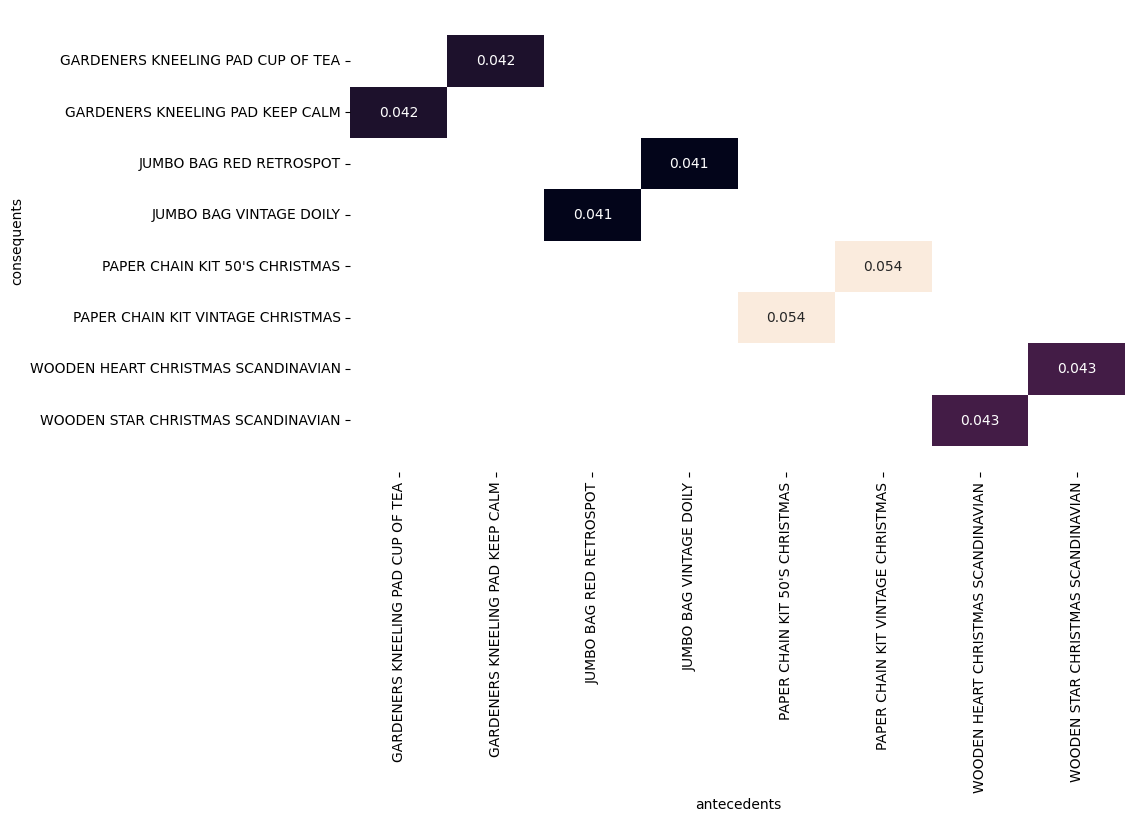

In [28]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.yticks(rotation=0)
plt.show()

## **Heatmaps with lift**
 we decide that that it is important to examine other metrics before making a final decision on which itemsto keep. In particular, we select a metric that tells us whether the support values are higher than we would expect given the films' individual support values.

We recall that lift does this well and decide to use it as a metric. We also remember that lift has an important threshold at  1.0
  and decide that it is important to replace the colorbar with annotations, so you can determine whether a value is greater than  1.0
 .

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


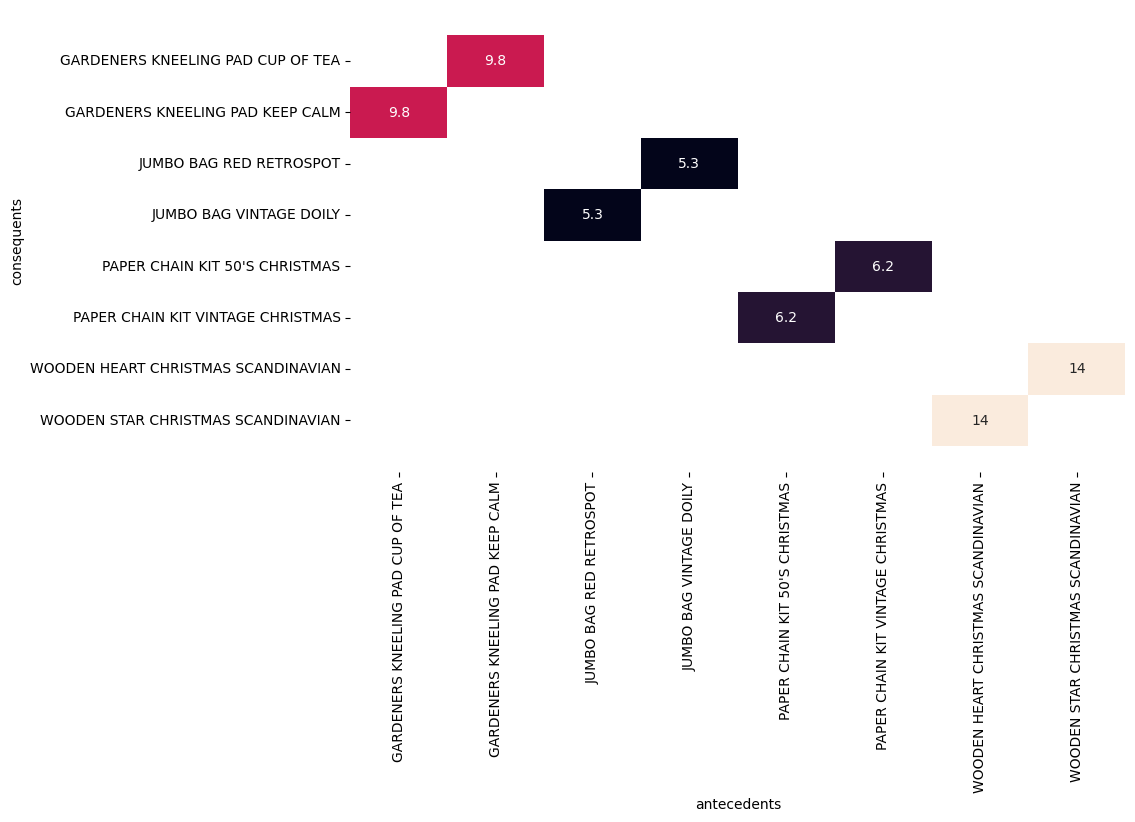

In [29]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents',
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


## **Scatterplots**
* Scatter plots will help us to evaluate general tendencies and behaviors of
rules between many antecedents and consequents but, without isolating any rule in particular.
* A scatterplot displays pairs of values.
 * Antecedent and consequent support.
 * Confidence and lift.
* No model is assumed.
 * No trend line or curve needed.
* Can provide starting point for pruning.
 * Identify patterns in data and rules.

## **What can we learn from scatterplots?**
* Identify natural thresholds in data.
 * Not possible with heatmaps or other visualizations.
* Visualize entire dataset.
 * Not limited to small number of rules.
* Use findings to prune.
 * Use natural thresholds and patterns to prune.

## **Pruning with scatterplots**
We have to focus on general patterns in the association rules and then perform pruning accordingly. Our goal should be to identify a large set of strong associations.

Fortunately, we've just learned how to generate scatterplots. We decide to start by plotting support and confidence, since all optimal rules according to many common metrics are located on the confidence-supply border.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-a61d3c4bbfdf>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = "support", y = "confidence", data = rules, palette = palette_1)


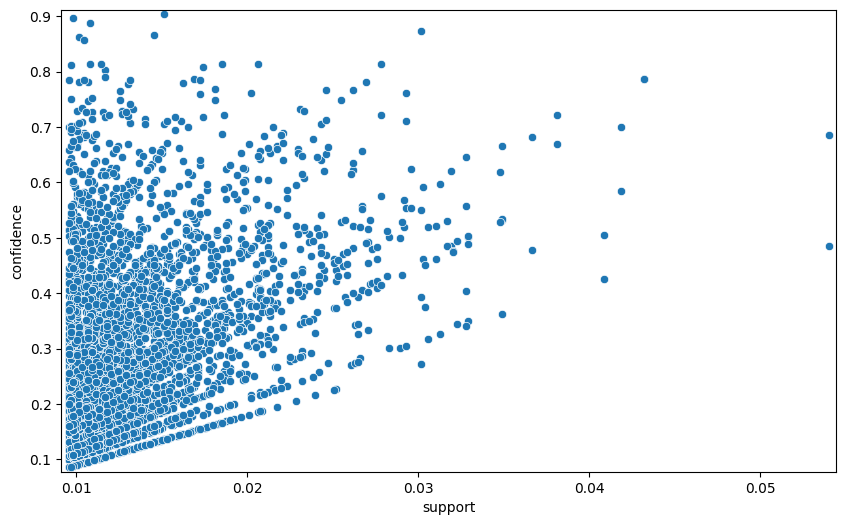

In [37]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(onehot_df, min_support = 0.0095,
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support',
                          min_threshold = 0.0)

palette_1 = sns.color_palette("coolwarm")
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules, palette = palette_1)
plt.margins(0.01,0.01)
plt.show()

**Notice that the confidence-support border roughly forms a triangle. This suggests that throwing out some low support rules would also mean that we would discard rules that are strong according to many common metrics.**

## **Optimality of the support-confidence border**

Recalling that scatterplots can scale the size of dots according to a third metric, we decide to use that to demonstrate optimality of the support-confidence border. We will show this by scaling the dot size using the lift metric, which was one of the metrics to which Bayardo-Agrawal applies.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


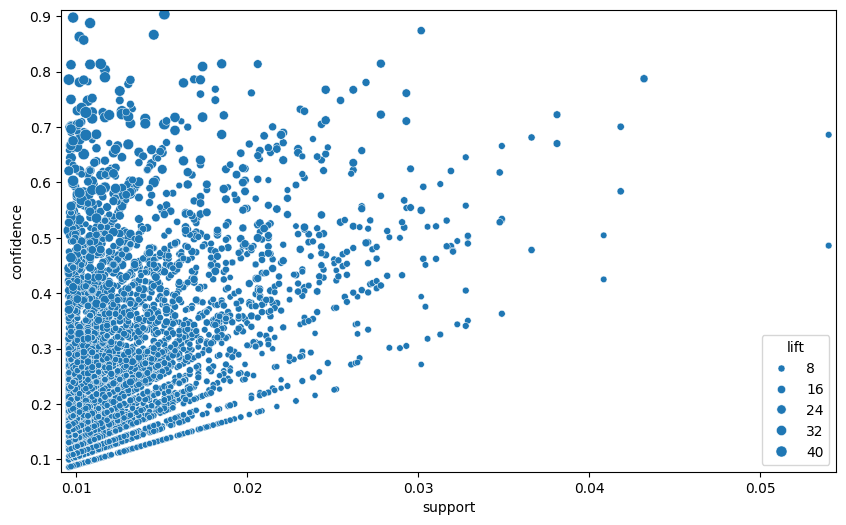

In [32]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()